# 📖 Nike Sales Data Storytelling & Advanced Analytics

## 🎯 Business Intelligence Deep Dive

This notebook focuses on **data storytelling** and **advanced business questions** that drive strategic decisions. Each section answers a critical business question with compelling visualizations and actionable insights.

### 📋 Storytelling Questions Covered:
1. **Regional Revenue Champions** - Which regions dominate and why?
2. **Profit vs Revenue Relationship** - Does high revenue mean high profits?
3. **Sales Fluctuation Patterns** - How do sales change over time?
4. **Product Performance Stories** - Which products tell the best success stories?
5. **Customer Journey Analysis** - How do different customer segments behave?
6. **Seasonal Business Cycles** - When should we expect peak performance?
7. **Discount Strategy Impact** - Are we discounting smart or just cutting profits?
8. **Competitive Market Position** - Where do we stand in the market?


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Plotly template
import plotly.io as pio
pio.templates.default = "plotly_white"

print("📚 Nike Data Storytelling Notebook Ready!")
print("🎯 Let's uncover the stories hidden in the data...")


📚 Nike Data Storytelling Notebook Ready!
🎯 Let's uncover the stories hidden in the data...


In [2]:
# Load and prepare data
df = pd.read_csv('../data/Nike_Sales_Cleaned.csv')
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Create additional storytelling metrics
df['Profit_Margin'] = (df['Profit'] / df['Revenue'] * 100).round(2)
df['Month'] = df['Order_Date'].dt.month
df['Month_Name'] = df['Order_Date'].dt.strftime('%B')
df['Quarter'] = df['Order_Date'].dt.quarter
df['Year_Month'] = df['Order_Date'].dt.to_period('M')
df['Revenue_per_Unit'] = df['Revenue'] / df['Units_Sold']
df['Profit_per_Unit'] = df['Profit'] / df['Units_Sold']

print(f"✅ Data loaded: {len(df):,} transactions")
print(f"📅 Date range: {df['Order_Date'].min().strftime('%Y-%m-%d')} to {df['Order_Date'].max().strftime('%Y-%m-%d')}")
print(f"🌍 Regions: {df['Region'].nunique()}")
print(f"👟 Products: {df['Product_Name'].nunique()}")


✅ Data loaded: 2,123 transactions
📅 Date range: 2023-07-26 to 2025-07-17
🌍 Regions: 6
👟 Products: 20


# 📍 Story 1: Regional Revenue Champions

## 🎯 **The Question:** Which regions dominate Nike's revenue and what makes them successful?

**Business Context:** Understanding regional performance helps allocate resources, identify market opportunities, and replicate success patterns across different locations.


In [3]:
# Story 1: Regional Revenue Champions Analysis
print("🏆 REGIONAL REVENUE CHAMPIONS ANALYSIS")
print("=" * 60)

# Calculate comprehensive regional metrics
regional_story = df.groupby('Region').agg({
    'Revenue': ['sum', 'mean', 'count'],
    'Profit': ['sum', 'mean'],
    'Units_Sold': 'sum',
    'Discount_Applied': 'mean',
    'MRP': 'mean'
}).round(2)

# Flatten column names
regional_story.columns = ['Total_Revenue', 'Avg_Revenue', 'Transaction_Count', 'Total_Profit', 'Avg_Profit', 'Total_Units', 'Avg_Discount', 'Avg_MRP']

# Calculate additional storytelling metrics
regional_story['Revenue_Share'] = (regional_story['Total_Revenue'] / regional_story['Total_Revenue'].sum() * 100).round(1)
regional_story['Profit_Margin'] = (regional_story['Total_Profit'] / regional_story['Total_Revenue'] * 100).round(1)
regional_story['Avg_Units_per_Transaction'] = (regional_story['Total_Units'] / regional_story['Transaction_Count']).round(2)
regional_story['Revenue_per_Unit'] = (regional_story['Total_Revenue'] / regional_story['Total_Units']).round(2)

# Sort by revenue
regional_story = regional_story.sort_values('Total_Revenue', ascending=False)

print("📊 REGIONAL PERFORMANCE RANKING:")
print("-" * 40)
for i, (region, row) in enumerate(regional_story.iterrows(), 1):
    print(f"{i}. {region}: ₹{row['Total_Revenue']:,.0f} ({row['Revenue_Share']:.1f}% of total)")
    print(f"   💰 Avg Transaction: ₹{row['Avg_Revenue']:,.0f} | 🎯 Margin: {row['Profit_Margin']:.1f}%")
    print(f"   📦 Units per Transaction: {row['Avg_Units_per_Transaction']:.1f} | 💵 Revenue/Unit: ₹{row['Revenue_per_Unit']:.0f}")
    print()

# Identify the champion and challenger
champion = regional_story.index[0]
challenger = regional_story.index[1]
champion_revenue = regional_story.iloc[0]['Total_Revenue']
challenger_revenue = regional_story.iloc[1]['Total_Revenue']
gap = champion_revenue - challenger_revenue

print(f"🏆 CHAMPION: {champion} leads with ₹{champion_revenue:,.0f} revenue")
print(f"🥈 CHALLENGER: {challenger} at ₹{challenger_revenue:,.0f} revenue")
print(f"📈 GAP: ₹{gap:,.0f} difference - {champion} is {(gap/challenger_revenue*100):.1f}% ahead")


🏆 REGIONAL REVENUE CHAMPIONS ANALYSIS
📊 REGIONAL PERFORMANCE RANKING:
----------------------------------------
1. Mumbai: ₹4,599,509 (17.8% of total)
   💰 Avg Transaction: ₹12,298 | 🎯 Margin: 11.4%
   📦 Units per Transaction: 2.1 | 💵 Revenue/Unit: ₹5920

2. Bangalore: ₹4,439,325 (17.1% of total)
   💰 Avg Transaction: ₹12,263 | 🎯 Margin: 12.0%
   📦 Units per Transaction: 2.0 | 💵 Revenue/Unit: ₹5991

3. Hyderabad: ₹4,385,633 (16.9% of total)
   💰 Avg Transaction: ₹12,639 | 🎯 Margin: 10.3%
   📦 Units per Transaction: 2.1 | 💵 Revenue/Unit: ₹5983

4. Delhi: ₹4,314,118 (16.7% of total)
   💰 Avg Transaction: ₹11,755 | 🎯 Margin: 11.7%
   📦 Units per Transaction: 2.0 | 💵 Revenue/Unit: ₹5870

5. Kolkata: ₹4,112,369 (15.9% of total)
   💰 Avg Transaction: ₹11,955 | 🎯 Margin: 12.0%
   📦 Units per Transaction: 2.0 | 💵 Revenue/Unit: ₹5995

6. Pune: ₹4,041,705 (15.6% of total)
   💰 Avg Transaction: ₹12,285 | 🎯 Margin: 11.1%
   📦 Units per Transaction: 2.0 | 💵 Revenue/Unit: ₹5988

🏆 CHAMPION: Mumbai le

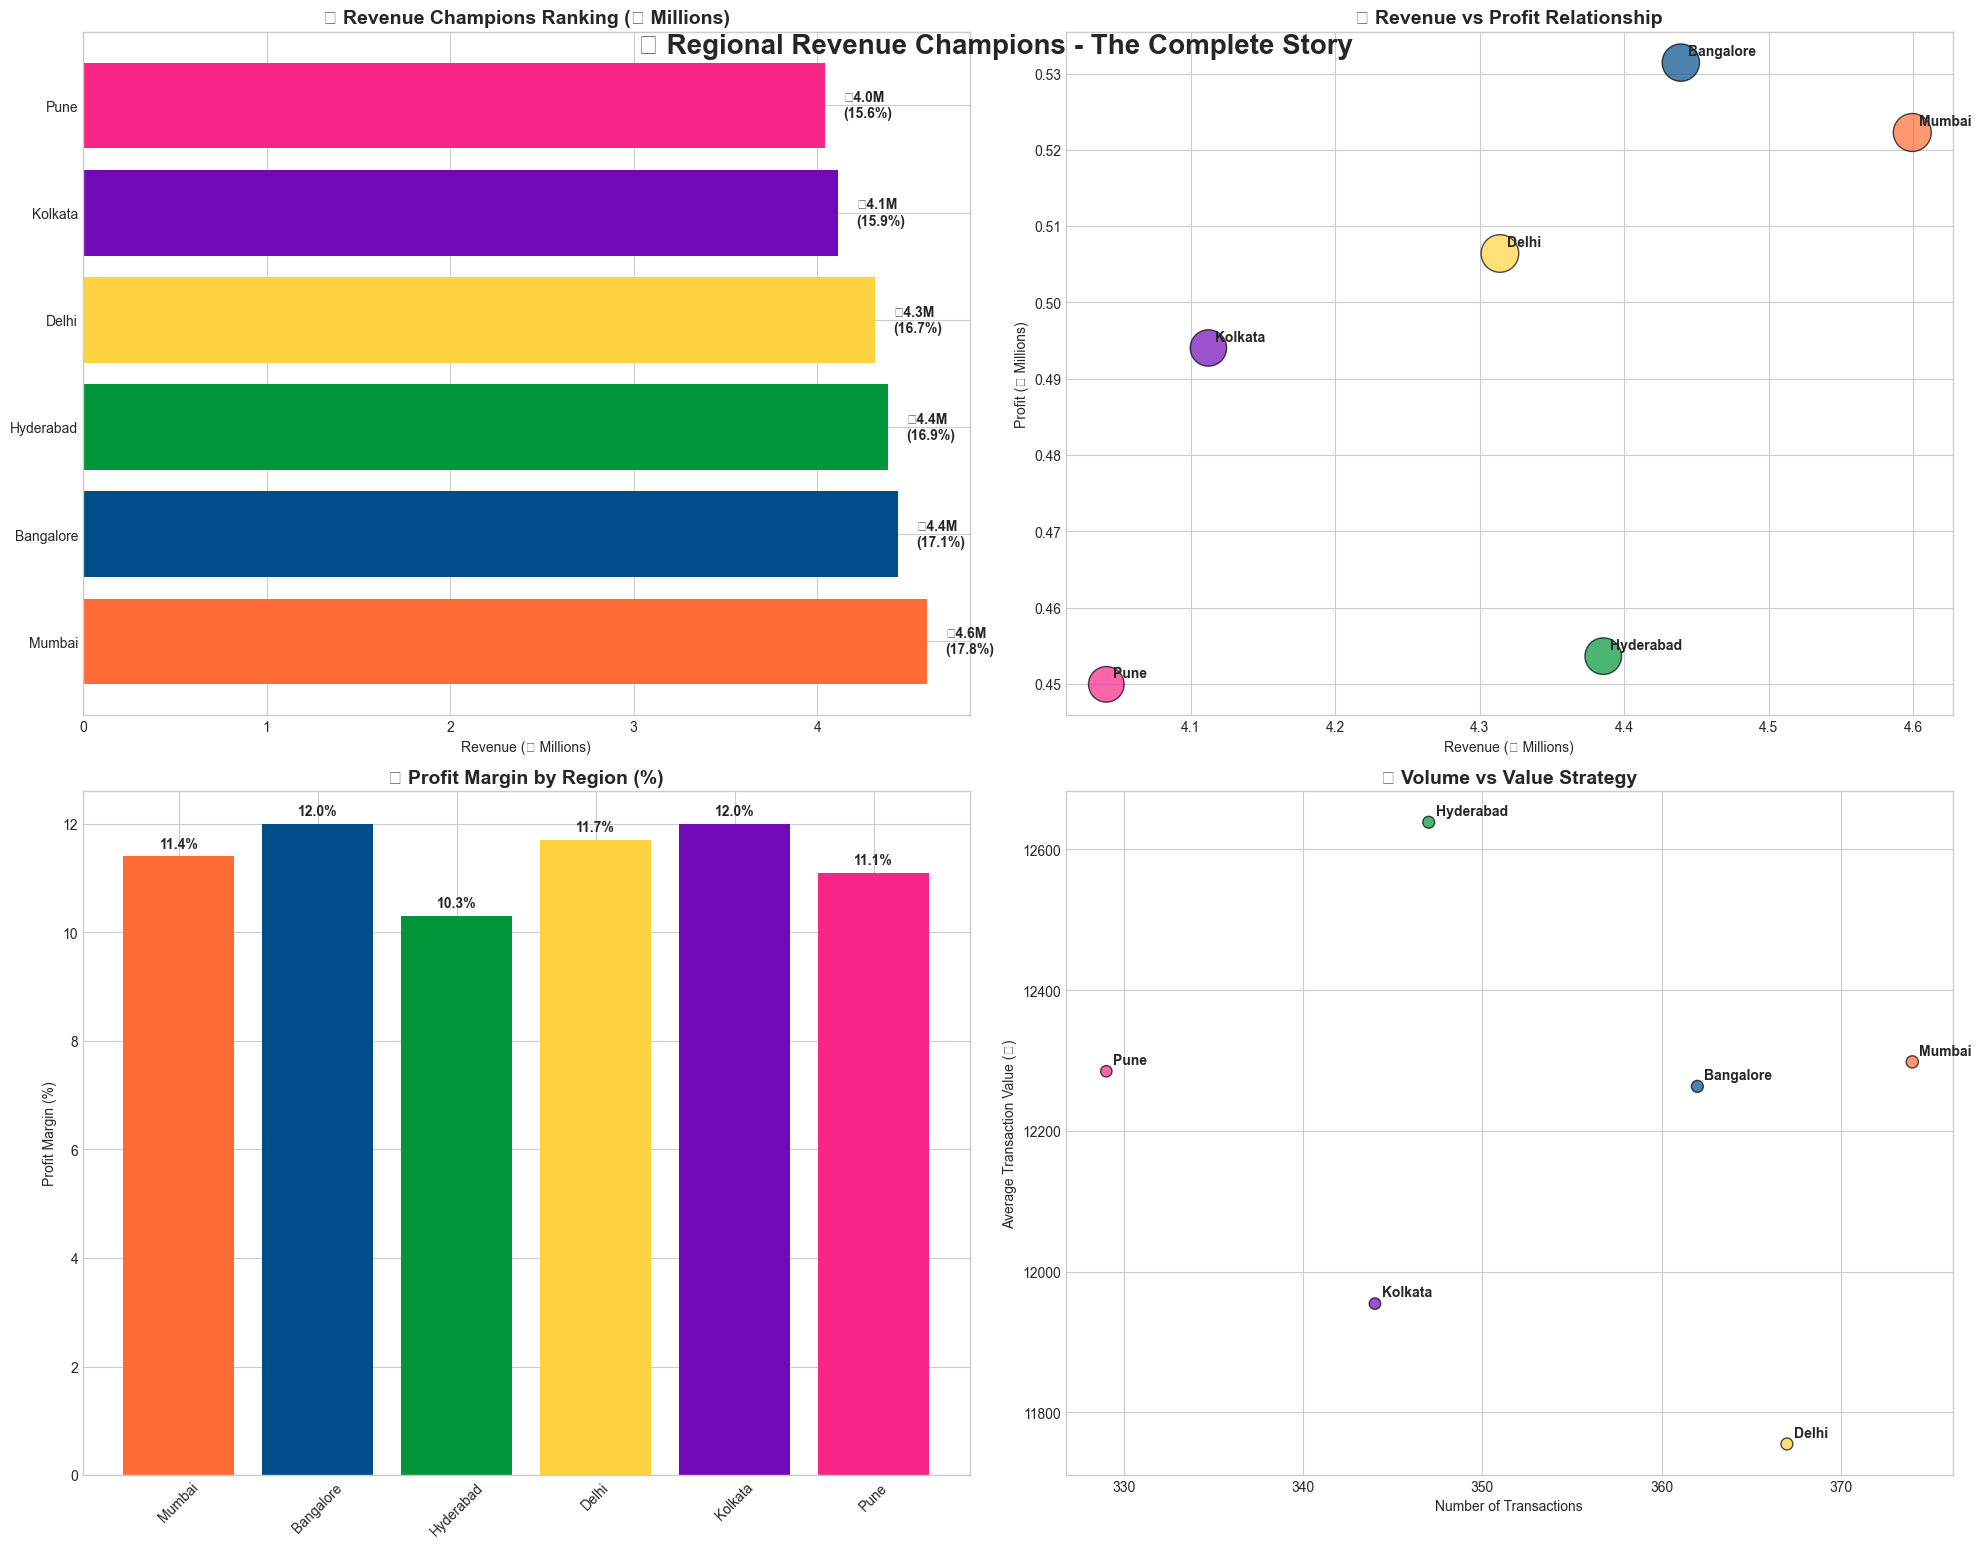


📖 STORY INSIGHTS:
------------------------------
🏆 Mumbai dominates through: High volume strategy
💡 Success factors: ₹12,298 avg transaction, 11.4% margin
🎯 Opportunity: Replicate Mumbai's strategy in underperforming regions


In [4]:
# Story 1: Regional Champions Visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('🏆 Regional Revenue Champions - The Complete Story', fontsize=20, fontweight='bold', y=0.95)

# Color scheme for regions
colors = ['#FF6B35', '#004E89', '#009639', '#FFD23F', '#7209B7', '#F72585']

# 1. Revenue Champions Ranking
bars1 = axes[0,0].barh(regional_story.index, regional_story['Total_Revenue']/1000000, color=colors)
axes[0,0].set_title('💰 Revenue Champions Ranking (₹ Millions)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Revenue (₹ Millions)')

# Add value labels
for i, (region, row) in enumerate(regional_story.iterrows()):
    axes[0,0].text(row['Total_Revenue']/1000000 + 0.1, i, 
                   f'₹{row["Total_Revenue"]/1000000:.1f}M\n({row["Revenue_Share"]:.1f}%)', 
                   va='center', fontweight='bold')

# 2. Revenue vs Profit Scatter
scatter = axes[0,1].scatter(regional_story['Total_Revenue']/1000000, regional_story['Total_Profit']/1000000, 
                           s=regional_story['Transaction_Count']*2, c=colors, alpha=0.7, edgecolors='black')
axes[0,1].set_title('💎 Revenue vs Profit Relationship', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Revenue (₹ Millions)')
axes[0,1].set_ylabel('Profit (₹ Millions)')

# Add region labels
for i, (region, row) in enumerate(regional_story.iterrows()):
    axes[0,1].annotate(region, 
                       (row['Total_Revenue']/1000000, row['Total_Profit']/1000000),
                       xytext=(5, 5), textcoords='offset points', fontweight='bold')

# 3. Profit Margin Comparison
bars2 = axes[1,0].bar(regional_story.index, regional_story['Profit_Margin'], color=colors)
axes[1,0].set_title('📊 Profit Margin by Region (%)', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Profit Margin (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4. Transaction Volume vs Average Value
scatter2 = axes[1,1].scatter(regional_story['Transaction_Count'], regional_story['Avg_Revenue'], 
                            s=regional_story['Total_Units']/10, c=colors, alpha=0.7, edgecolors='black')
axes[1,1].set_title('📈 Volume vs Value Strategy', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Number of Transactions')
axes[1,1].set_ylabel('Average Transaction Value (₹)')

# Add region labels
for i, (region, row) in enumerate(regional_story.iterrows()):
    axes[1,1].annotate(region, 
                       (row['Transaction_Count'], row['Avg_Revenue']),
                       xytext=(5, 5), textcoords='offset points', fontweight='bold')

plt.tight_layout()
plt.show()

# Story Insights
print("\n📖 STORY INSIGHTS:")
print("-" * 30)
print(f"🏆 {champion} dominates through: {'High volume' if regional_story.loc[champion, 'Transaction_Count'] > regional_story['Transaction_Count'].mean() else 'High value'} strategy")
print(f"💡 Success factors: ₹{regional_story.loc[champion, 'Avg_Revenue']:,.0f} avg transaction, {regional_story.loc[champion, 'Profit_Margin']:.1f}% margin")
print(f"🎯 Opportunity: Replicate {champion}'s strategy in underperforming regions")


# 💰 Story 2: The Revenue-Profit Paradox

## 🎯 **The Question:** Does high revenue always mean high profits? Are we sacrificing margins for volume?

**Business Context:** Understanding the relationship between revenue and profit helps optimize pricing strategies and identify which transactions truly contribute to the bottom line.


In [5]:
# Story 2: Revenue-Profit Relationship Analysis
print("💰 REVENUE-PROFIT RELATIONSHIP ANALYSIS")
print("=" * 60)

# Calculate correlation
revenue_profit_corr = df['Revenue'].corr(df['Profit'])
print(f"📊 Revenue-Profit Correlation: {revenue_profit_corr:.3f}")

# Analyze by different segments
segment_analysis = df.groupby('Region').apply(lambda x: x['Revenue'].corr(x['Profit'])).round(3)
print(f"\n🌍 Regional Revenue-Profit Correlations:")
for region, corr in segment_analysis.sort_values(ascending=False).items():
    print(f"   {region}: {corr:.3f}")

# Identify profit anomalies
high_revenue_low_profit = df[(df['Revenue'] > df['Revenue'].quantile(0.8)) & (df['Profit'] < df['Profit'].quantile(0.2))]
low_revenue_high_profit = df[(df['Revenue'] < df['Revenue'].quantile(0.2)) & (df['Profit'] > df['Profit'].quantile(0.8))]

print(f"\n⚠️  ANOMALY DETECTION:")
print(f"   High Revenue, Low Profit: {len(high_revenue_low_profit)} transactions (₹{high_revenue_low_profit['Revenue'].sum():,.0f} revenue, ₹{high_revenue_low_profit['Profit'].sum():,.0f} profit)")
print(f"   Low Revenue, High Profit: {len(low_revenue_high_profit)} transactions (₹{low_revenue_high_profit['Revenue'].sum():,.0f} revenue, ₹{low_revenue_high_profit['Profit'].sum():,.0f} profit)")

# Calculate efficiency metrics
df['Profit_Efficiency'] = df['Profit'] / df['Revenue']
df['Revenue_Efficiency'] = df['Revenue'] / df['Units_Sold']

# Top and bottom performers
top_profit_efficiency = df.nlargest(10, 'Profit_Efficiency')
bottom_profit_efficiency = df.nsmallest(10, 'Profit_Efficiency')

print(f"\n🏆 TOP 10 MOST PROFIT-EFFICIENT TRANSACTIONS:")
for _, row in top_profit_efficiency.iterrows():
    print(f"   {row['Product_Name'][:20]}... | ₹{row['Revenue']:,.0f} → ₹{row['Profit']:,.0f} ({row['Profit_Efficiency']:.1%} efficiency)")

print(f"\n⚠️  TOP 10 LEAST PROFIT-EFFICIENT TRANSACTIONS:")
for _, row in bottom_profit_efficiency.iterrows():
    print(f"   {row['Product_Name'][:20]}... | ₹{row['Revenue']:,.0f} → ₹{row['Profit']:,.0f} ({row['Profit_Efficiency']:.1%} efficiency)")


💰 REVENUE-PROFIT RELATIONSHIP ANALYSIS
📊 Revenue-Profit Correlation: -0.029

🌍 Regional Revenue-Profit Correlations:
   Mumbai: 0.046
   Pune: 0.026
   Delhi: 0.011
   Kolkata: -0.052
   Bangalore: -0.095
   Hyderabad: -0.108

⚠️  ANOMALY DETECTION:
   High Revenue, Low Profit: 100 transactions (₹1,970,079 revenue, ₹-63,777 profit)
   Low Revenue, High Profit: 82 transactions (₹428,677 revenue, ₹282,290 profit)

🏆 TOP 10 MOST PROFIT-EFFICIENT TRANSACTIONS:
   Premier III... | ₹2,196 → ₹3,810 (173.5% efficiency)
   Tiempo Legend... | ₹2,120 → ₹2,996 (141.3% efficiency)
   Flex Trainer... | ₹2,816 → ₹3,837 (136.2% efficiency)
   LeBron 20... | ₹2,371 → ₹3,044 (128.4% efficiency)
   Flex Trainer... | ₹2,467 → ₹3,102 (125.7% efficiency)
   Zoom Freak... | ₹3,010 → ₹3,754 (124.7% efficiency)
   Flex Trainer... | ₹2,750 → ₹2,979 (108.3% efficiency)
   Blazer Mid... | ₹3,240 → ₹3,467 (107.0% efficiency)
   Kyrie Flytrap... | ₹3,355 → ₹3,487 (103.9% efficiency)
   Dunk Low... | ₹2,276 → ₹2,343

# 📈 Story 3: The Sales Fluctuation Mystery

## 🎯 **The Question:** How do sales fluctuate over time? Are there hidden patterns that can predict future performance?

**Business Context:** Understanding sales patterns helps with inventory planning, marketing campaigns, and resource allocation throughout the year.


In [6]:
# Story 3: Sales Fluctuation Analysis
print("📈 SALES FLUCTUATION ANALYSIS")
print("=" * 60)

# Monthly aggregation
monthly_trends = df.groupby('Year_Month').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum',
    'Order_ID': 'count',
    'Discount_Applied': 'mean'
}).round(2)

monthly_trends['Avg_Transaction_Value'] = monthly_trends['Revenue'] / monthly_trends['Order_ID']
monthly_trends['Profit_Margin'] = (monthly_trends['Profit'] / monthly_trends['Revenue'] * 100).round(1)

# Calculate growth rates
monthly_trends['Revenue_Growth'] = monthly_trends['Revenue'].pct_change() * 100
monthly_trends['Profit_Growth'] = monthly_trends['Profit'].pct_change() * 100
monthly_trends['Volume_Growth'] = monthly_trends['Units_Sold'].pct_change() * 100

print("📊 MONTHLY PERFORMANCE SUMMARY:")
print("-" * 40)
for period, row in monthly_trends.iterrows():
    growth_indicator = "📈" if row['Revenue_Growth'] > 0 else "📉" if row['Revenue_Growth'] < 0 else "➡️"
    print(f"{str(period):<12} | {growth_indicator} ₹{row['Revenue']/1000000:.1f}M | ₹{row['Profit']/1000000:.1f}M | {row['Profit_Margin']:.1f}% | {row['Order_ID']:.0f} orders")

# Identify patterns
peak_month = monthly_trends['Revenue'].idxmax()
low_month = monthly_trends['Revenue'].idxmin()
volatility = monthly_trends['Revenue_Growth'].std()

print(f"\n🎯 KEY PATTERNS:")
print(f"   Peak Month: {peak_month} (₹{monthly_trends.loc[peak_month, 'Revenue']/1000000:.1f}M)")
print(f"   Low Month: {low_month} (₹{monthly_trends.loc[low_month, 'Revenue']/1000000:.1f}M)")
print(f"   Volatility: {volatility:.1f}% (standard deviation of growth rates)")

# Seasonal analysis
seasonal_analysis = df.groupby('Month').agg({
    'Revenue': 'mean',
    'Profit': 'mean',
    'Units_Sold': 'mean',
    'Order_ID': 'count'
}).round(2)

seasonal_analysis['Revenue_per_Month'] = seasonal_analysis['Revenue']
seasonal_analysis['Profit_per_Month'] = seasonal_analysis['Profit']

print(f"\n🗓️  SEASONAL PATTERNS (Average per Month):")
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month in seasonal_analysis.index:
    month_name = month_names[month-1]
    row = seasonal_analysis.loc[month]
    print(f"   {month_name}: ₹{row['Revenue_per_Month']/1000000:.1f}M revenue, ₹{row['Profit_per_Month']/1000000:.1f}M profit, {row['Order_ID']:.0f} orders")

# Trend analysis
revenue_trend = np.polyfit(range(len(monthly_trends)), monthly_trends['Revenue'], 1)[0]
profit_trend = np.polyfit(range(len(monthly_trends)), monthly_trends['Profit'], 1)[0]

print(f"\n📈 TREND ANALYSIS:")
print(f"   Revenue Trend: {'📈 Growing' if revenue_trend > 0 else '📉 Declining'} by ₹{abs(revenue_trend)/1000000:.1f}M per month")
print(f"   Profit Trend: {'📈 Growing' if profit_trend > 0 else '📉 Declining'} by ₹{abs(profit_trend)/1000000:.1f}M per month")


📈 SALES FLUCTUATION ANALYSIS
📊 MONTHLY PERFORMANCE SUMMARY:
----------------------------------------
2023-07      | ➡️ ₹0.1M | ₹0.0M | 22.5% | 4 orders
2023-08      | 📈 ₹0.3M | ₹0.0M | 17.1% | 24 orders
2023-09      | 📉 ₹0.2M | ₹0.0M | 10.7% | 16 orders
2023-10      | 📉 ₹0.1M | ₹0.0M | 9.0% | 11 orders
2023-11      | 📈 ₹0.3M | ₹0.0M | 17.8% | 25 orders
2023-12      | 📉 ₹0.2M | ₹0.0M | 8.7% | 17 orders
2024-01      | 📈 ₹0.4M | ₹0.0M | 5.5% | 37 orders
2024-02      | 📉 ₹0.2M | ₹0.0M | 15.6% | 18 orders
2024-03      | 📈 ₹0.4M | ₹0.0M | 11.6% | 30 orders
2024-04      | 📉 ₹0.2M | ₹0.0M | 8.0% | 12 orders
2024-05      | 📈 ₹0.4M | ₹0.0M | 7.1% | 26 orders
2024-06      | 📉 ₹0.2M | ₹0.0M | 16.0% | 20 orders
2024-07      | 📈 ₹0.3M | ₹0.0M | 11.3% | 20 orders
2024-08      | 📈 ₹0.3M | ₹0.0M | 14.8% | 24 orders
2024-09      | 📉 ₹0.2M | ₹0.0M | 15.8% | 20 orders
2024-10      | 📈 ₹0.2M | ₹0.0M | 10.2% | 21 orders
2024-11      | 📈 ₹0.3M | ₹0.0M | 6.7% | 19 orders
2024-12      | 📈 ₹19.9M | ₹2.3M | 11.5